In [1]:
from arcgis.gis import GIS

In [2]:
portal = GIS("http://p132ipp.img.com.br/portal", "portaladmin", "portaladmin1")

In [3]:
agol = GIS("http://imagem.maps.arcgis.com", "mpontes_imagem", "@Imagem123")

In [4]:
webmap_portal = portal.content.get("ecc0a556c1bd48f99e6d210a40b811ea")

In [5]:
from arcgis.mapping import WebMap

<Item title:"CarteiraProjetosWM" type:Web Map owner:portaladmin>
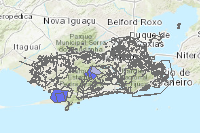

In [6]:
webmap_portal

In [17]:
agol.content.search("name: 'SIGTEP' AND type: 'Feature Service'")

[<Item title:"Feature Obras" type:Feature Layer Collection owner:mpontes_imagem>]

In [19]:
agol.content.search('name: "SJC" AND type: "Feature Service"')

[<Item title:"Parques_SJC" type:Feature Layer Collection owner:lferreira@img.com.br_imagem>,
 <Item title:"EleicaoPrefeito2012_SJC" type:Feature Layer Collection owner:alaor.bianco_imagem>,
 <Item title:"Academias_SJC" type:Feature Layer Collection owner:agavlak@img.com.br_imagem>,
 <Item title:"POIs_SJC" type:Feature Layer Collection owner:jcruz_imagem>,
 <Item title:"Votacao2012_SJC" type:Feature Layer Collection owner:alaor.bianco_imagem>,
 <Item title:"SJC_Collector" type:Feature Layer Collection owner:claranjeira_imagem>,
 <Item title:"SJC_Gestao" type:Feature Layer Collection owner:jcruz_imagem>,
 <Item title:"SJC_Cosmetico" type:Feature Layer Collection owner:lcarli_imagem>]

Como não está sendo possível fazer uma busca com match exato do nome e tipo, sera preciso iterar sobre o retorno para dar match no nome do servico

In [20]:
it = agol.content.get("3888188407b842aeb6c823bfd7dd1309")

In [21]:
from arcgis.features import FeatureLayerCollection

In [22]:
itc = FeatureLayerCollection.fromitem(it)

In [23]:
itc.layers

[<FeatureLayer url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/Dados_Dengue/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/Dados_Dengue/FeatureServer/1">]

In [24]:
itc.properties.layers

[{
   "id": 0,
   "name": "PainelDengue.DBO.FT_DADOS_DENGUE",
   "parentLayerId": -1,
   "defaultVisibility": true,
   "subLayerIds": null,
   "minScale": 0,
   "maxScale": 0,
   "geometryType": "esriGeometryPoint"
 }, {
   "id": 1,
   "name": "PainelDengue.DBO.LimiteBairro",
   "parentLayerId": -1,
   "defaultVisibility": true,
   "subLayerIds": null,
   "minScale": 2311163,
   "maxScale": 4513,
   "geometryType": "esriGeometryPolygon"
 }]

In [28]:
dir(it)

['_RELATIONSHIP_DIRECTIONS',
 '_RELATIONSHIP_TYPES',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_publish_status',
 '_create_proxy',
 '_delete_proxy',
 '_depend',
 '_get_icon',
 '_gis',
 '_has_layers',
 '_hydrate',
 '_hydrated',
 '_populate_layers',
 '_portal',
 '_repr_html_',
 '_uid',
 '_user_id',
 '_ux_item_type',
 '_workdir',
 'access',
 'accessInformation',
 'add_comment',
 'add_relationship',
 'appCategories',
 'app_info',
 'avgRating',
 'banner',
 'categories',
 'clear',
 'comments',
 'commentsEnabled',
 'content_status',
 'copy',
 'copy_feature_la

In [32]:
it.tables

[<Table url:"https://services.arcgis.com/qFQYQQeTXZSPY7Fs/arcgis/rest/services/Dados_Dengue/FeatureServer/2">]

In [33]:
import re

In [35]:
dir(re)

['A',
 'ASCII',
 'DEBUG',
 'DOTALL',
 'I',
 'IGNORECASE',
 'L',
 'LOCALE',
 'M',
 'MULTILINE',
 'Match',
 'Pattern',
 'RegexFlag',
 'S',
 'Scanner',
 'T',
 'TEMPLATE',
 'U',
 'UNICODE',
 'VERBOSE',
 'X',
 '_MAXCACHE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_cache',
 '_compile',
 '_compile_repl',
 '_expand',
 '_locale',
 '_pickle',
 '_special_chars_map',
 '_subx',
 'compile',
 'copyreg',
 'enum',
 'error',
 'escape',
 'findall',
 'finditer',
 'fullmatch',
 'functools',
 'match',
 'purge',
 'search',
 'split',
 'sre_compile',
 'sre_parse',
 'sub',
 'subn',
 'template']

In [41]:
re.findall("\/(\d+)$", it.layers[0].url)

['0']

In [43]:
type(webmap_portal)

arcgis.gis.Item

In [44]:
WebMap

arcgis.mapping._types.WebMap

In [45]:
wm = WebMap(webmap_portal)

In [46]:
wm

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [48]:
allit = wm.layers + wm.tables

In [49]:
allit

[{
   "id": "CarteiraProjetosHOM_9511",
   "layerType": "ArcGISFeatureLayer",
   "url": "https://p132ipp.img.com.br/arcgis/rest/services/SIGTEP/CarteiraProjetosHOM/FeatureServer/0",
   "visibility": true,
   "opacity": 1,
   "mode": 1,
   "title": "CarteiraProjetosHOM",
   "itemId": "9f036c08d00c49f0acdbf41a02837b5a",
   "popupInfo": {
     "title": "GISDBHML.DBO.FT_CarteiraProjeto: {created_user}",
     "fieldInfos": [
       {
         "fieldName": "OBJECTID",
         "label": "C\u00f3digo do Projeto",
         "isEditable": false,
         "tooltip": "",
         "visible": false,
         "format": null,
         "stringFieldOption": "textbox"
       },
       {
         "fieldName": "created_user",
         "label": "Criador",
         "isEditable": false,
         "tooltip": "",
         "visible": false,
         "format": null,
         "stringFieldOption": "textbox"
       },
       {
         "fieldName": "created_date",
         "label": "Data Cria\u00e7\u00e3o",
         "

In [52]:
it = type(allit[0])

In [53]:
it

arcgis._impl.common._mixins.PropertyMap

In [54]:
it.share

AttributeError: type object 'PropertyMap' has no attribute 'share'

In [55]:
from arcgis.features import FeatureLayer

In [56]:
FeatureLayer.fromitem(it)

AttributeError: type object 'PropertyMap' has no attribute 'type'

In [60]:
it = FeatureLayer(allit[0].url)

In [61]:
it.share

AttributeError: 'FeatureLayer' object has no attribute 'share'

In [62]:
dir(it)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_attachment',
 '_con',
 '_delete_attachment',
 '_download_metadata',
 '_dynamic_layer',
 '_gis',
 '_hydrate',
 '_hydrated',
 '_invoke',
 '_list_attachments',
 '_lyr_dict',
 '_lyr_domains',
 '_lyr_json',
 '_metadatamanager',
 '_query',
 '_query_df',
 '_refresh',
 '_status_metadata',
 '_storage',
 '_token',
 '_update_attachment',
 '_url',
 'append',
 'attachments',
 'calculate',
 'container',
 'delete_features',
 'edit_features',
 'filter',
 'fromitem',
 'generate_renderer',
 'get_html_popup',
 'get_unique_values',
 'manager',
 'metadata',
 'properties',
 'query',
 'query_related_records',
 'update_metadata',
 'url',
 